In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


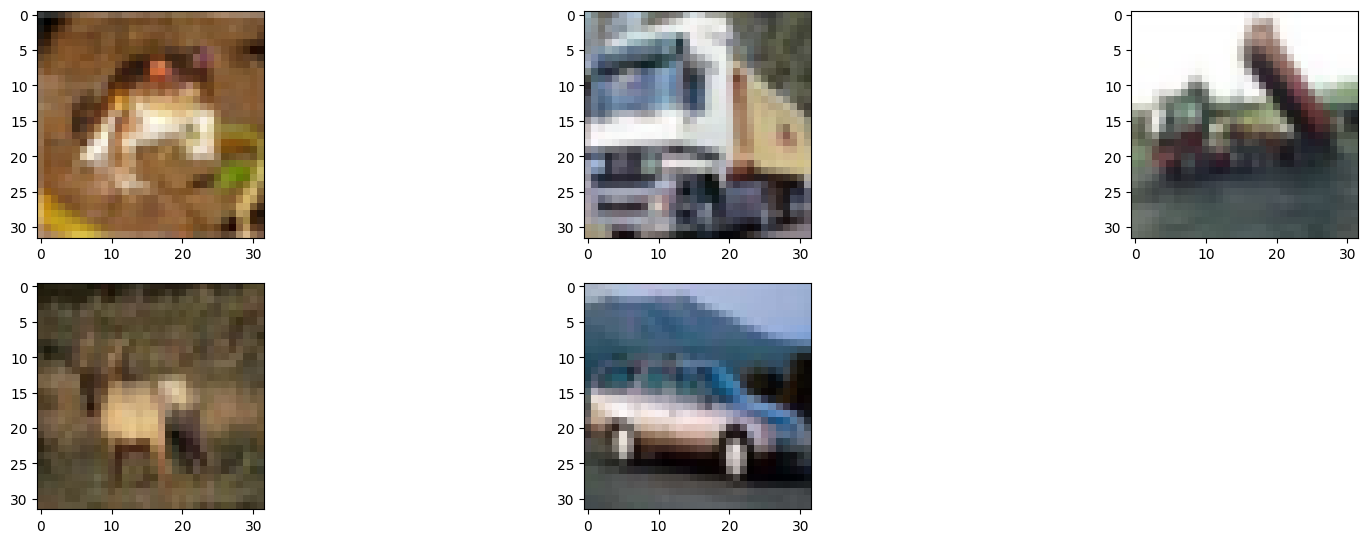

In [4]:
n=5
plt.figure(figsize=(20,10))
for i in range(n):
   plt.subplot(330+1+i)
   plt.imshow(x_train[i])
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,Activation
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.utils import to_categorical

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [8]:
model=Sequential([
                  tf.keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)),
                  tf.keras.layers.Dropout(0.2),

                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)),
                  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                   tf.keras.layers.Conv2D(64,(3,3), activation='relu',padding='same',kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.Dropout(0.2),

                   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.Dropout(0.2),

                   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                   tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.Dropout(0.2),
                   tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dropout(0.5),

                   tf.keras.layers.Dense(1024,activation='relu',kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.Dropout(0.5),

                   tf.keras.layers.Dense(512,activation='relu',kernel_constraint=MaxNorm(3)),
                   tf.keras.layers.Dropout(0.5),

                   tf.keras.layers.Dense(num_classes,activation='softmax')
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [10]:
sgd=SGD(learning_rate=0.01,momentum=0.9,nesterov=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train, y_train, epochs=20, verbose=1,validation_data=(x_test, y_test),batch_size=64)

Epoch 1/20
782/782 [==============================] - 600s 764ms/step - loss: 2.1404 - accuracy: 0.1901 - val_loss: 1.9838 - val_accuracy: 0.2671
Epoch 2/20
782/782 [==============================] - 583s 745ms/step - loss: 1.7796 - accuracy: 0.3180 - val_loss: 1.6452 - val_accuracy: 0.3699
Epoch 3/20
782/782 [==============================] - 568s 726ms/step - loss: 1.5802 - accuracy: 0.4093 - val_loss: 1.4574 - val_accuracy: 0.4722
Epoch 4/20
782/782 [==============================] - 553s 708ms/step - loss: 1.3984 - accuracy: 0.4915 - val_loss: 1.2666 - val_accuracy: 0.5383
Epoch 5/20
782/782 [==============================] - 553s 707ms/step - loss: 1.2257 - accuracy: 0.5607 - val_loss: 1.1192 - val_accuracy: 0.5978
Epoch 6/20
782/782 [==============================] - 552s 706ms/step - loss: 1.0915 - accuracy: 0.6107 - val_loss: 1.1171 - val_accuracy: 0.6252
Epoch 7/20
782/782 [==============================] - 553s 708ms/step - loss: 0.9883 - accuracy: 0.6522 - val_loss: 0.9206 -

Text(0.5, 1.0, 'Training and validation loss')

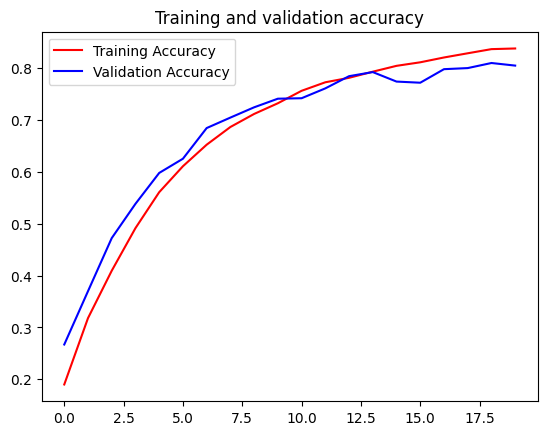

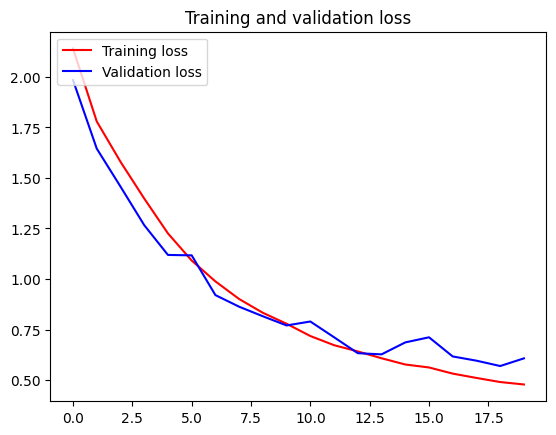

In [12]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation  Loss")
plt.legend(['Training loss', 'Validation loss'], loc='upper left')

plt.title('Training and validation loss')


In [14]:
acc=model.evaluate(x_test, y_test)
print(acc*100)

313/313 [==============================] - 27s 87ms/step - loss: 0.6076 - accuracy: 0.8047
[0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.8047000169754028, 0.6076191067695618, 0.804700

In [15]:
model.save('model1_cifar10_10epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from google.colab import files
img=files.upload()

Saving download7.jpeg to download7.jpeg


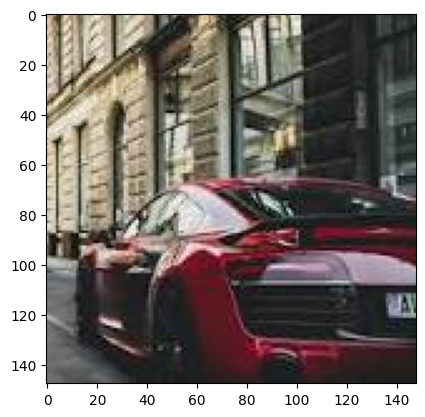

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
im=Image.open('download7.jpeg')
plt.imshow(im)
plt.show()

In [26]:
results={0:'aeroplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

from PIL import Image
import numpy as np
im=Image.open('download7.jpeg')
im=im.resize((32,32))
im=np.expand_dims(im, axis=0)
im=np.array(im)
from keras.models import load_model
model = load_model('model1_cifar10_10epochs.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
pred=model.predict([im])[0]
print(pred,results.get(int(np.argmax(pred))))

1/1 [==============================] - 0s 147ms/step
[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1427918e-34] automobile
